In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
%matplotlib inline

**Problem.** Expand in a Fourier series in the form of a superposition of simple harmonics the function $f(x)$ defined on the segment $[T/2, T/2]$.
Show:

1. amplitude and phase spectra;
2. Fourier series partial sums $S_3(x)$, $S_{10}(x)$, $S_{20}(x)$, $S_{100}(x)$ plots.


**Задача.** Разложить в ряд Фурье в форме суперпозиции простых гармоник функцию $f(x)$, заданную на отрезке $[T/2, T/2]$.
Построить:

1. амплитудный и фазовый спектры;
2. графики частичных сумм ряда Фурье $S_3(x)$, $S_{10}(x)$, $S_{20}(x)$, $S_{100}(x)$.



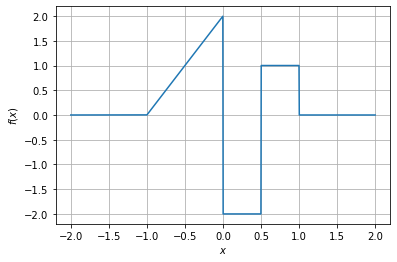

In [135]:
T = 2 # period

def f(x):
    if -1 <= x < 0:
        return 2 * x + 2
    elif 0 <= x < 0.5:
        return -2
    elif 0.5 <= x <= 1:
        return 1
    else:
        return 0

x = np.linspace(-2, 2, 1000)
y = [f(xi) for xi in x]

plt.figure()
plt.plot(x, y)
plt.grid()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.show()


Fourier coefficients / Коэффициенты Фурье

$$a_0 = \frac{2}{T} \int_{-T/2}^{T/2} f(x) dx$$
$$a_n = \frac{2}{T} \int_{-T/2}^{T/2} f(x) \cos(2\pi\frac{n}{T}x) dx$$
$$b_n = \frac{2}{T} \int_{-T/2}^{T/2} f(x) \sin(2\pi\frac{n}{T}x) dx$$

In [43]:
a_0 = 2 / T * quad(f, -T / 2, T / 2)[0]
print("a_0 = {}".format(a_0))

a_0 = 0.5


In [172]:
def a(n):
    return (4 * np.sin(np.pi * n / 2) ** 2 / (np.pi * n) -
            2 * np.sin(np.pi * n / 2) +
            np.sin(np.pi * n) - np.sin(np.pi * n / 2)) / (np.pi * n)

def b(n):
    return (2 * (np.sin(np.pi * n) - np.pi * n) / (np.pi * n) -
            np.cos(np.pi * n) + np.cos(np.pi * n / 2) +
            4 * (np.cos(np.pi * n / 4) ** 2 - 1)) / (np.pi * n)

Function break points / Точки разрыва:

* $x_1 = -1$, $y_1 = 0.5$
* $x_2 = 0$, $y_2 = 0$
* $x_3 = 0.5$, $y_3 = -0.5$
* $x_4 = 1$, $y_4 = 0.5$

1. Amplitude and phase spectra / Амплитудный и фазовый спектры

$$d_n = \sqrt{a_n^2 + b_n^2}$$
$$\theta_n = arctan2(-\frac{b_n}{a_n})$$

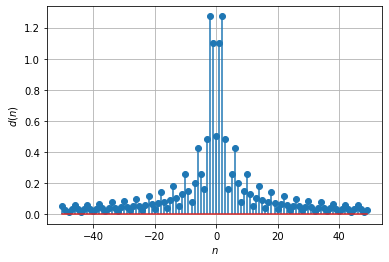

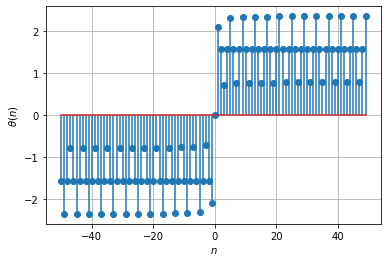

In [184]:
def amplitude(n):
    if n == 0:
        return a_0
    return np.sqrt(a(n) ** 2 + b(n) ** 2)

def phase(n):
    if n == 0:
        return 0
    return np.angle(a(n) - 1j*b(n))

def frequency(n):
    return n / T

def harmonics(x, n):
    return amplitude(n) * np.cos(2 * np.pi * frequency(n) * x + phase(n))

n = np.arange(-50, 50)
amp = [amplitude(ni) for ni in n]
ph = [phase(ni) for ni in n]

plt.figure()
plt.stem(n, amp)
plt.grid()
plt.xlabel("$n$")
plt.ylabel("$d(n)$")
plt.show()

plt.figure()
plt.stem(n, ph)
plt.grid()
plt.xlabel("$n$")
plt.ylabel("$\\theta(n)$")
plt.show()

2. Fourier series partial sums plots / Графики частичных сумм ряда Фурье

$$\nu_n = \frac{n}{T}$$
$$S_N = \frac{d_0}{2} + \sum_{n=1}^{N} d_n \cos(2\pi\nu_n x + \theta_n)$$

In [174]:
def s(x, number=3):
    result = 0
    for ni in range(1, number + 1):
        result += harmonics(x, ni)
    
    return a_0 + result

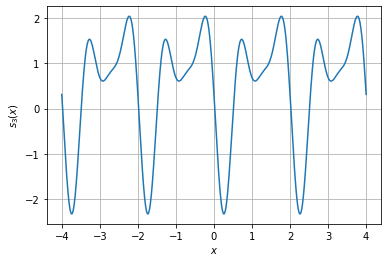

In [175]:
x = np.linspace(-2 * T, 2 * T, 1000)
s_3 = s(x, 3)

plt.figure()
plt.plot(x, s_3)
plt.grid()
plt.xlabel("$x$")
plt.ylabel("$s_3(x)$")
plt.show()

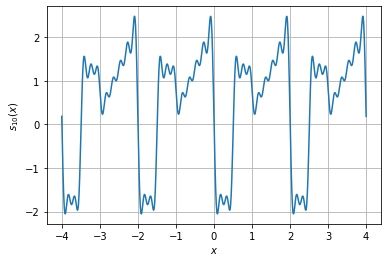

In [181]:
s_10 = s(x, 10)

plt.figure()
plt.plot(x, s_10)
plt.grid()
plt.xlabel("$x$")
plt.ylabel("$s_{10}(x)$")
plt.show()

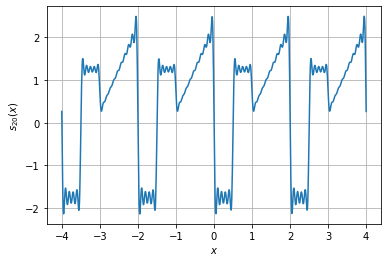

In [180]:
s_20 = s(x, 20)

plt.figure()
plt.plot(x, s_20)
plt.grid()
plt.xlabel("$x$")
plt.ylabel("$s_{20}(x)$")
plt.show()

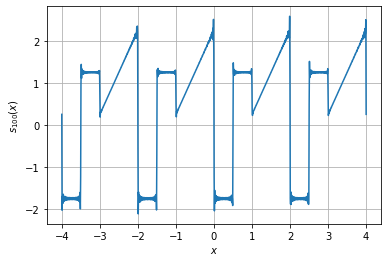

In [179]:
s_100 = s(x, 100)

plt.figure()
plt.plot(x, s_100)
plt.grid()
plt.xlabel("$x$")
plt.ylabel("$s_{100}(x)$")
plt.show()